## About the Dataset


Column Profiling:

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
> * FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.  
> * Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv(r"C:\Users\ASUS DEMO\Desktop\delhivery_data.csv")
pd.DataFrame(df)
print(df)


            data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Ca

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [9]:
df.loc[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,24.0,20.0,21.7243,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,40.0,27.0,32.5395,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,61.0,39.0,45.5619,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,67.0,44.0,49.4772,1.200000,trip-153741093647649320IND388121AAAIND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320IND388620AABIND388320AAA
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,18.045481,44.0,17.0,21.2890,2.588235,43.0,17.0,21.2890,4.666667,trip-153741093647649320IND388620AABIND388320AAA
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,28.061896,65.0,29.0,35.8252,2.241379,64.0,28.0,35.8252,1.909091,trip-153741093647649320IND388620AABIND388320AAA
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,38.939167,76.0,39.0,47.1900,1.948718,74.0,38.0,47.1900,1.000000,trip-153741093647649320IND388620AABIND388320AAA
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,43.595802,102.0,45.0,53.2334,2.266667,100.0,44.0,53.2334,4.333333,trip-153741093647649320IND388620AABIND388320AAA


In [18]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [19]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [22]:
segment_df = df.sort_values(by=['segment_id', 'actual_time']).groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()


,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


# Data Cleaning & Feature Extraction


In [10]:
df.loc[df.trip_uuid=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_id
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,24.0,20.0,21.7243,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,40.0,27.0,32.5395,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,61.0,39.0,45.5619,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,67.0,44.0,49.4772,1.200000,trip-153741093647649320IND388121AAAIND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320IND388620AABIND388320AAA
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,18.045481,44.0,17.0,21.2890,2.588235,43.0,17.0,21.2890,4.666667,trip-153741093647649320IND388620AABIND388320AAA
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,28.061896,65.0,29.0,35.8252,2.241379,64.0,28.0,35.8252,1.909091,trip-153741093647649320IND388620AABIND388320AAA
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,38.939167,76.0,39.0,47.1900,1.948718,74.0,38.0,47.1900,1.000000,trip-153741093647649320IND388620AABIND388320AAA
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,43.595802,102.0,45.0,53.2334,2.266667,100.0,44.0,53.2334,4.333333,trip-153741093647649320IND388620AABIND388320AAA


## Merging Rows by Trip ID

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv(r"C:\Users\ASUS DEMO\Desktop\delhivery_data.csv")
pd.DataFrame(df)


df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

            data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Ca

In [6]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [7]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [12]:

def merge_segment(group):
    
    return group.sum()  
segment_df = (
    df.sort_values(by=['segment_id', 'actual_time'])
      .groupby('segment_id')
      .agg(merge_segment)
      .reset_index()
)
print(segment_df.head())

                                        segment_id  \
0  trip-153671041653548748IND209304AAAIND000000ACB   
1  trip-153671041653548748IND462022AAAIND209304AAA   
2  trip-153671042288605164IND561203AABIND562101AAA   
3  trip-153671042288605164IND572101AAAIND561203AAB   
4  trip-153671043369099517IND000000ACBIND160002AAC   

                                                data  \
0  trainingtrainingtrainingtrainingtrainingtraini...   
1  trainingtrainingtrainingtrainingtrainingtraini...   
2                           trainingtrainingtraining   
3   trainingtrainingtrainingtrainingtrainingtraining   
4  trainingtrainingtrainingtrainingtrainingtraini...   

                                  trip_creation_time  \
0  2018-09-12 00:00:16.5357412018-09-12 00:00:16....   
1  2018-09-12 00:00:16.5357412018-09-12 00:00:16....   
2  2018-09-12 00:00:22.8864302018-09-12 00:00:22....   
3  2018-09-12 00:00:22.8864302018-09-12 00:00:22....   
4  2018-09-12 00:00:33.6912502018-09-12 00:00:33....   

 

In [13]:
segment_df.loc[segment_df['trip_uuid']=='trip-153741093647649320']

,segment_id,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [15]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [16]:
trip_df = segment_df.sort_values(['trip_uuid','od_start_time']).groupby('trip_uuid').agg(merge_trip).reset_index()
trip_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748trip-153671041653548748...,2018-09-12 00:00:16.5357412018-09-12 00:00:16....,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLF...,IND209304AAAIND209304AAAIND209304AAAIND209304A...,Kanpur_Central_H_6 (Uttar Pradesh)Kanpur_Centr...,IND000000ACBIND000000ACBIND000000ACBIND000000A...,Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_...,2018-09-12 16:39:46.8584692018-09-12 16:39:46....,2018-09-13 13:40:23.1237442018-09-13 13:40:23....,22680.0,3778.765471,6484.0,3464.0,4540.1261,6434.0,5032.0,6343.4400
1,trip-153671041653548748trip-153671041653548748...,2018-09-12 00:00:16.5357412018-09-12 00:00:16....,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLF...,IND462022AAAIND462022AAAIND462022AAAIND462022A...,Bhopal_Trnsport_H (Madhya Pradesh)Bhopal_Trnsp...,IND209304AAAIND209304AAAIND209304AAAIND209304A...,Kanpur_Central_H_6 (Uttar Pradesh)Kanpur_Centr...,2018-09-12 00:00:16.5357412018-09-12 00:00:16....,2018-09-12 16:39:46.8584692018-09-12 16:39:46....,20979.0,5082.046634,9198.0,4323.0,6037.6386,9082.0,5638.0,7878.6704
2,trip-153671042288605164trip-153671042288605164...,2018-09-12 00:00:22.8864302018-09-12 00:00:22....,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,CartingCartingCarting,IND561203AABIND561203AABIND561203AAB,Doddablpur_ChikaDPP_D (Karnataka)Doddablpur_Ch...,IND562101AAAIND562101AAAIND562101AAA,Chikblapur_ShntiSgr_D (Karnataka)Chikblapur_Sh...,2018-09-12 02:03:09.6555912018-09-12 02:03:09....,2018-09-12 03:01:59.5988552018-09-12 03:01:59....,174.0,53.310332,96.0,55.0,60.3157,95.0,55.0,60.3159
3,trip-153671042288605164trip-153671042288605164...,2018-09-12 00:00:22.8864302018-09-12 00:00:22....,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,CartingCartingCartingCartingCartingCarting,IND572101AAAIND572101AAAIND572101AAAIND572101A...,Tumkur_Veersagr_I (Karnataka)Tumkur_Veersagr_I...,IND561203AABIND561203AABIND561203AABIND561203A...,Doddablpur_ChikaDPP_D (Karnataka)Doddablpur_Ch...,2018-09-12 00:00:22.8864302018-09-12 00:00:22....,2018-09-12 02:03:09.6555912018-09-12 02:03:09....,732.0,186.897974,303.0,155.0,209.1151,301.0,144.0,208.1935
4,trip-153671043369099517trip-153671043369099517...,2018-09-12 00:00:33.6912502018-09-12 00:00:33....,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTLFTL,IND000000ACBIND000000ACBIND000000ACBIND000000A...,Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_...,IND160002AACIND160002AACIND160002AACIND160002A...,Chandigarh_Mehmdpur_H (Punjab)Chandigarh_Mehmd...,2018-09-14 03:40:17.1067332018-09-14 03:40:17....,2018-09-14 17:34:55.4424542018-09-14 17:34:55....,10008.0,1725.590250,2601.0,1427.0,1975.7409,2584.0,1476.0,2062.8567


In [17]:
trip_df.shape

(21885, 18)

## Handling Missing Values

In [18]:
#Check for missing values in the aggregated data
trip_df.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [19]:
# Remove trips with missing values in source/destination
trip_df.dropna(inplace=True)
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21885 entries, 0 to 21884
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       21885 non-null  object 
 1   trip_creation_time              21885 non-null  object 
 2   route_schedule_uuid             21885 non-null  object 
 3   route_type                      21885 non-null  object 
 4   source_center                   21885 non-null  object 
 5   source_name                     21885 non-null  object 
 6   destination_center              21885 non-null  object 
 7   destination_name                21885 non-null  object 
 8   od_start_time                   21885 non-null  object 
 9   od_end_time                     21885 non-null  object 
 10  start_scan_to_end_scan          21885 non-null  float64
 11  actual_distance_to_destination  21885 non-null  float64
 12  actual_time                     

In [20]:
trip_df.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

## Feature Extraction

In [22]:
trip_df.destination_name.value_counts()

destination_name
Bhiwandi_Mankoli_HB (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)Bhiwandi_Mankoli_HB (Maharashtra)                                                                               188
Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)    187
Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_Bomsndra_HB (Karnataka)             169
Chandigarh_Mehmdpur_H (Punjab)Chandigarh_Mehmdpur_H (Punjab)Chandigarh_Mehmdpur_H (Punjab)Chandigarh_Mehmdpur_H (Punjab)                                                          155
Bengaluru_KGAirprt_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)                                              150
                                                                         

## Handling Outliers

In [25]:
numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

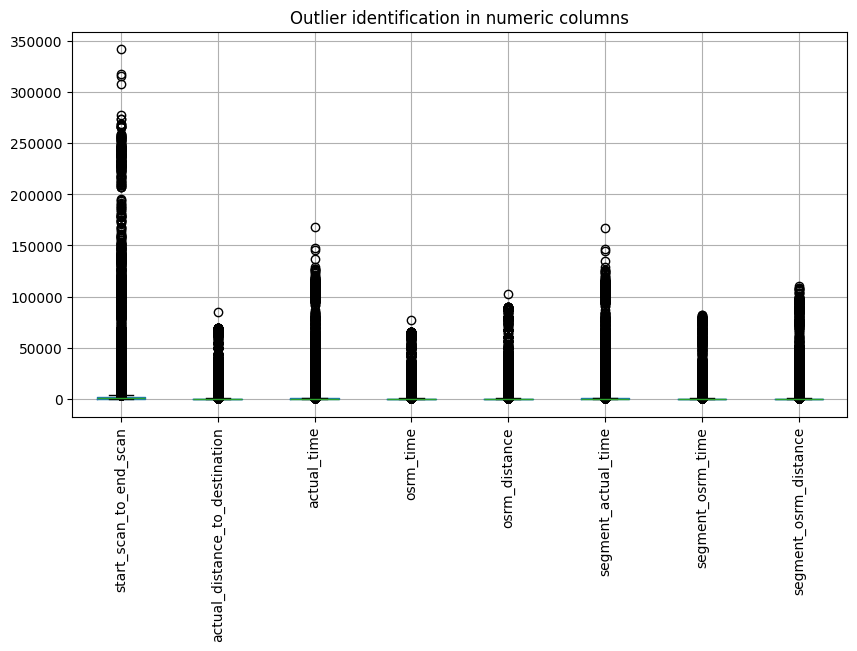

In [26]:
trip_df[numeric_cols].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Outlier identification in numeric columns')
plt.show();

In [27]:

q1 = trip_df[numeric_cols].quantile(0.25)
q3 = trip_df[numeric_cols].quantile(0.75)

iqr = q3-q1
iqr

start_scan_to_end_scan            1375.000000
actual_distance_to_destination     211.817239
actual_time                        505.000000
osrm_time                          233.000000
osrm_distance                      277.731700
segment_actual_time                501.000000
segment_osrm_time                  245.000000
segment_osrm_distance              291.298100
dtype: float64

In [28]:
trip_df = trip_df[~((trip_df[numeric_cols]<q1-(1.5*iqr)) | (trip_df[numeric_cols]>q3+(1.5*iqr))).any(axis=1)].reset_index()

# Exploratory Data Analysis

In [29]:


trip_df[numeric_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000
mean,694.440448,114.886419,264.784448,126.583552,145.209602,262.742601,132.577622,150.311952
std,630.557569,101.698996,230.457683,106.655559,127.281658,228.872254,114.889010,133.149386
min,22.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,254.000000,46.385539,102.000000,49.000000,57.594750,101.000000,50.000000,58.385600
50%,484.000000,86.203131,191.000000,95.000000,106.730700,189.000000,96.000000,109.712600
75%,924.000000,139.759770,352.000000,175.000000,196.659450,349.000000,185.000000,209.117200
max,3735.000000,550.658072,1380.000000,638.000000,721.992900,1365.000000,669.000000,791.343800


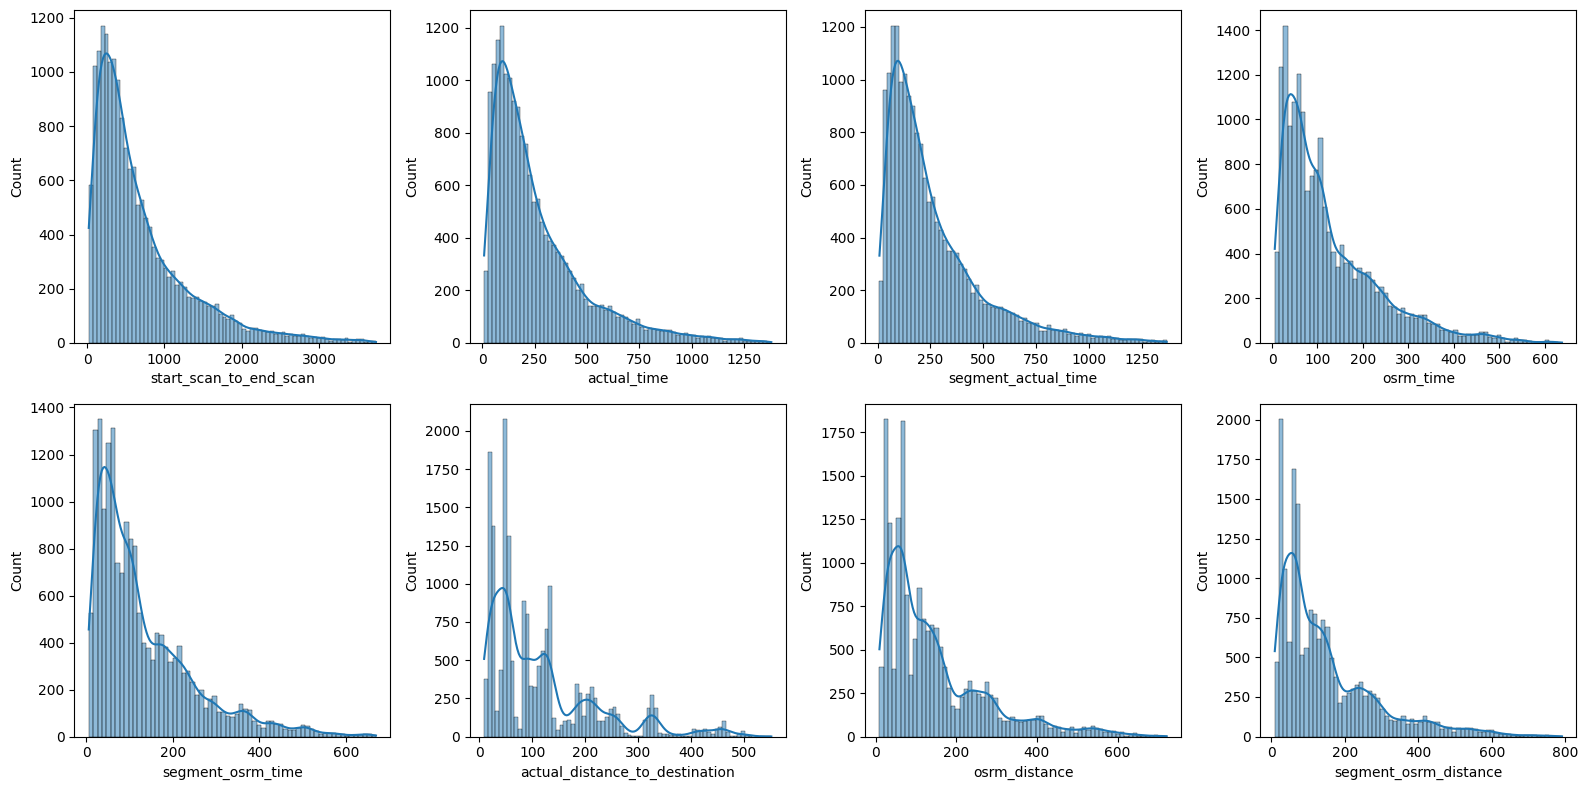

In [30]:


fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=trip_df['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()

## Actual Time & Segment Actual Time

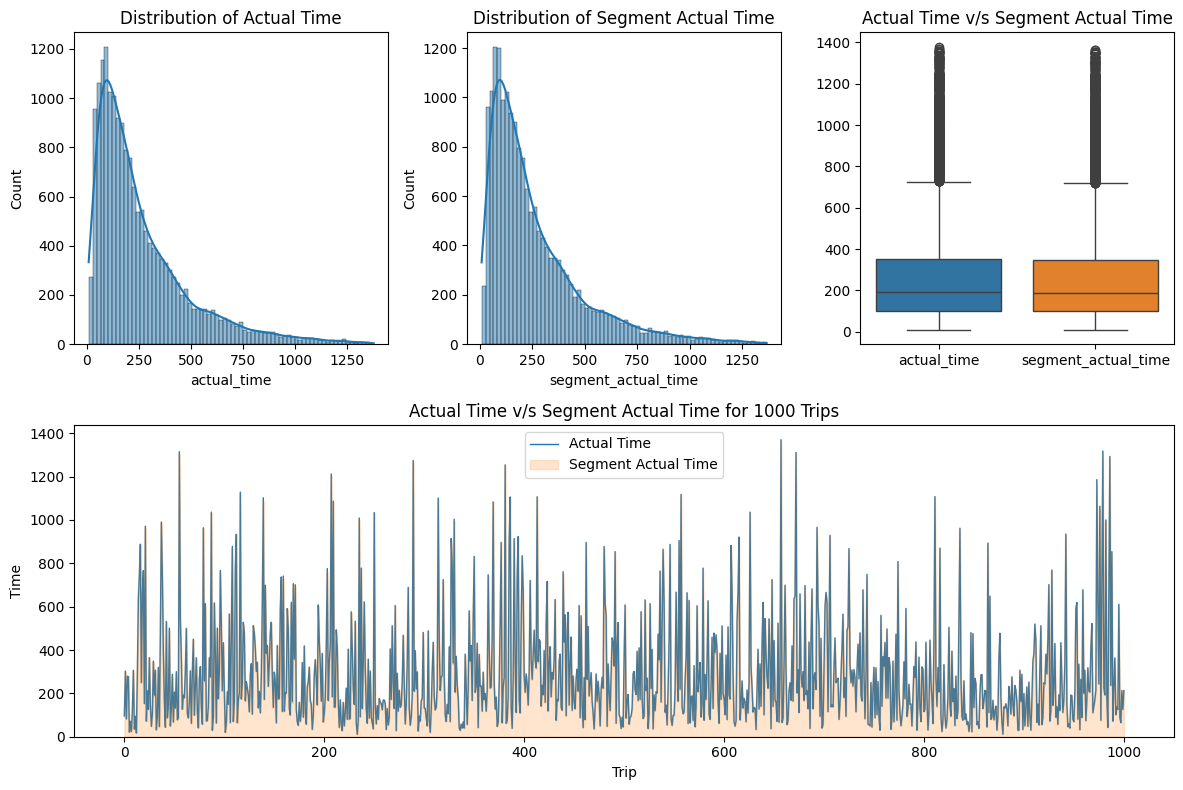

In [32]:


fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['actual_time','segment_actual_time']], ax=ax[2])
sns.lineplot(data=trip_df['actual_time'].loc[:1000], label='Actual Time',
             ax=ax[3], lw=1)
trip_df['segment_actual_time'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.2,
                                              label='Segment Actual Time')

ax[0].set_title('Distribution of Actual Time')
ax[1].set_title('Distribution of Segment Actual Time')
ax[2].set_title('Actual Time v/s Segment Actual Time')
ax[3].set_title('Actual Time v/s Segment Actual Time for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time')
ax[3].legend()

plt.tight_layout()
plt.show();

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

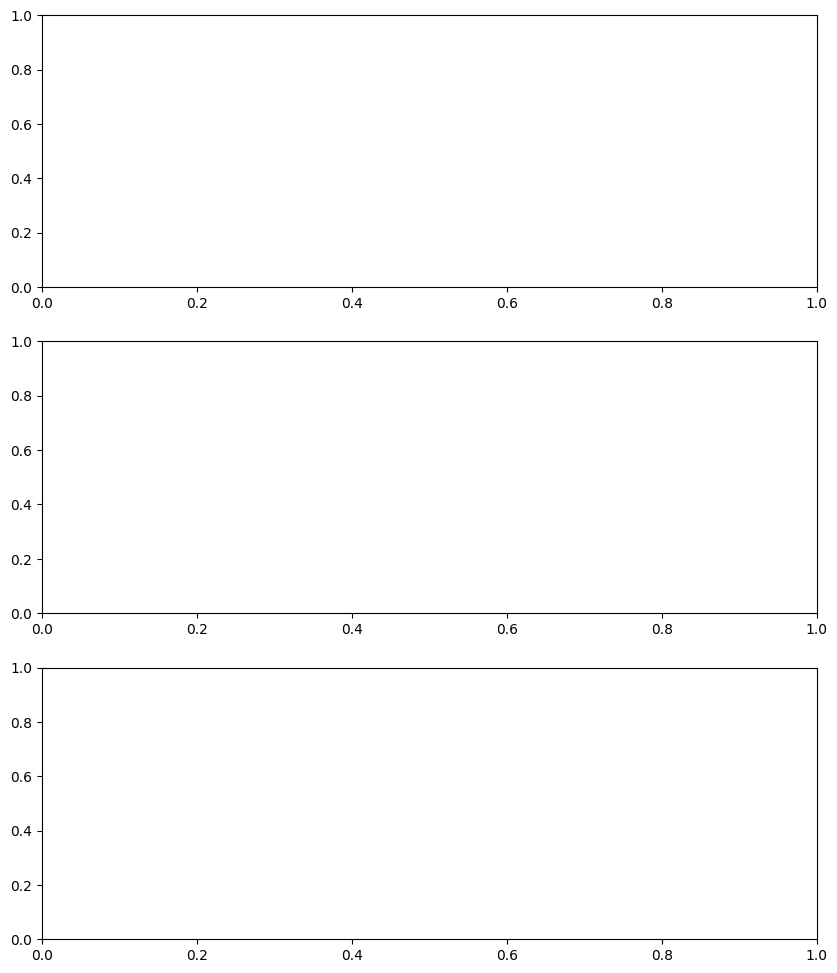

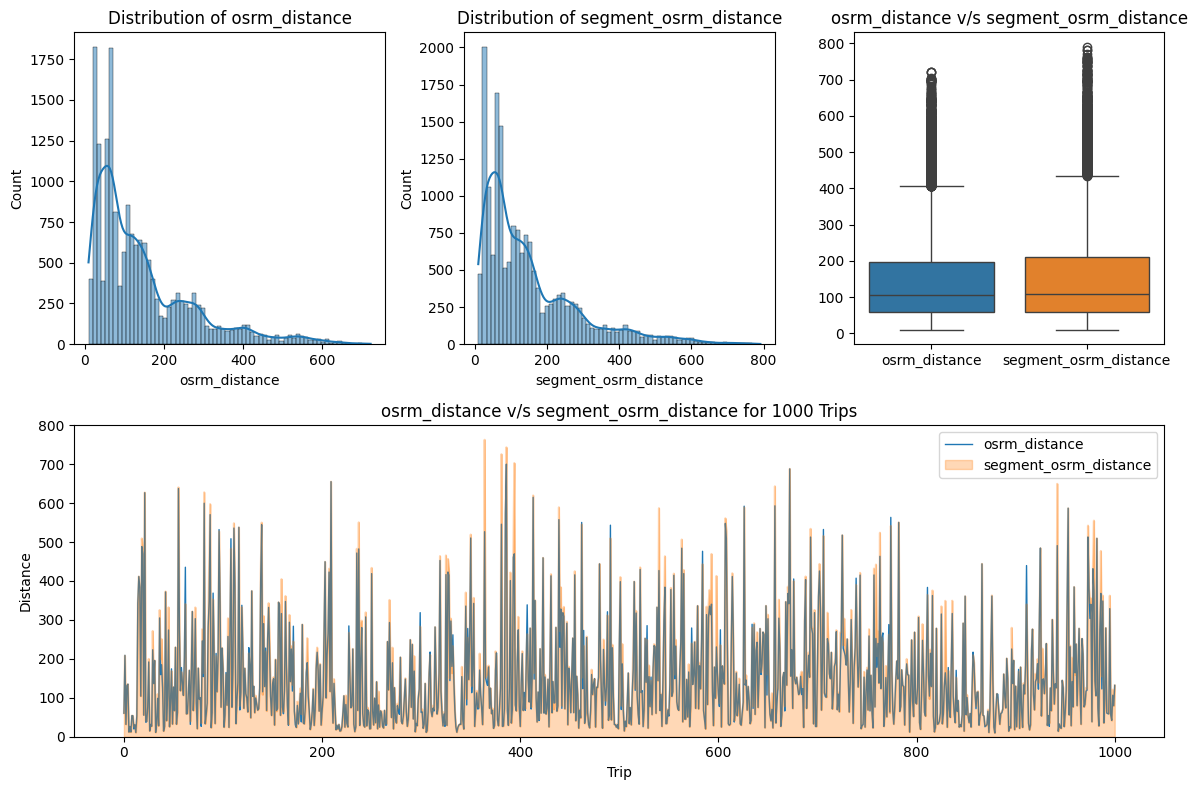

In [45]:
#distribution of osrm distance and segment osrm distance

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['osrm_distance','segment_osrm_distance']], ax=ax[2])
sns.lineplot(data=trip_df['osrm_distance'].loc[:1000], label='osrm_distance',
             ax=ax[3], lw=1)
trip_df['segment_osrm_distance'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.3,
                                              label='segment_osrm_distance')

ax[0].set_title('Distribution of osrm_distance')
ax[1].set_title('Distribution of segment_osrm_distance')
ax[2].set_title('osrm_distance v/s segment_osrm_distance')
ax[3].set_title('osrm_distance v/s segment_osrm_distance for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Distance')
ax[3].legend()

plt.tight_layout()
plt.show();